<h1><center> Le taux d'attrition des employés qu'est-ce que c'est ?</center></h1>



<div style="width:100%;text-align: center;"> <img align=middle src="https://media0.giphy.com/media/Q6l0us2sAAAiL9RMnP/giphy.gif"  width="500"> </div>


Le taux d'attrition c'est la diminution ou perte d'une quantité de personnes sur un ensemble donné et une période délimitée.
C'est un indicateur qui sert à mesurer le niveau de perte de clientèle ou d'abonnés à un produit, un service ou une marque.

Cet indicateur est donc plutôt orienté consommateurs mais il arrive d’entendre parler du taux d’attrition des effectifs d’une entreprise. Dans ce cas, il s’agit de la perte, naturelle ou non, de salariés due, par exemple, à des décès, départs en retraite ou à un taux d’usure trop élevé. Il se mesure généralement de façon annuelle et se calcule de la manière suivante :

Taux d’attrition = (Nombre de clients ou employés perdus / Nombre total de clients ou employés au début de la période) x 100

- Tout d'abord, nous devons importer pandas pour lire le fichier CSV.

In [1]:
# Importer Pandas, ProfileReport et le module Classification Pycaret 
import pandas as pd
from pandas_profiling import ProfileReport
from pycaret.classification import *


In [2]:
data = pd.read_csv('IBM_employee_attrition.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Analyse exploratoire 

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Il semble qu'il n'y a pas de valeurs null dans ce dataset.

Profile Report permet d'effectuer une analyse exploratoire rapide avec simplement une ligne de code

In [5]:
profile = ProfileReport(data, title="Pandas Profiling Report",minimal=True)

In [6]:
profile

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nous pouvons facilement observer grâce à Profile Report quelles sont les principaux problèmes du dataset.

* Par exemple :  "EmployeeCount has constant value "1"" 

En effet il ne nous sert à rien d'avoir une variable constante car, du fait qu'elle ne varie pas, elle n'aura aucun impact sur notre variable cible (Target).

De ce fait, nous allons enlever toutes les variables avec une valeure unique.

- Nous observons que notre dataset contient des employés âgés de 18 à 60 ans avec un âge moyen à 37 ans.
- Notre variable target ATTRITION  n'est pas équilibré,1233 No pour 237 Yes.
- Nous avons 3 catégories de travails "Recherche et développement","Ventes" et "Ressources humaines".
- La plupart des employés travaillent relativement prés de leurs domiciles.
- Ils ont en moyenne une éducation bachelor
- La plupart sont mariés
- Ils ont en moyenne eu une promotion il y a 4 ans dernièrement

Nous pouvons sortir énormement d'informations en une seule ligne de code grâce à Pandas Profile Report 



In [7]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
data=data.drop(columns =['EmployeeCount', 'Over18','StandardHours'])

In [9]:
data.shape

(1470, 32)

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Cette Dataframe contient 1470 lignes et 35 colonnes. 
Nous avons donc 35 variables concernant les employés qui peuvent induire l'attrition. 


In [11]:
import plotly.express as px

In [12]:
corrMatrix = data.corr() #Matrice de corrélation intéractive pour vérifier quelles sont les variable qui sont corrélés
fig=px.imshow(corrMatrix, title='Matrice de Corrélation Intéractive')
fig.show()

La matrice de corrélations permet de voir les relations linèaires entre les variables.
On peut voir que l'âge est corrélé avec le niveau du métier ce qui parait cohérent.

In [13]:
F=data[data["Gender"]=="Female"]
M=data[data["Gender"]=="Male"]


In [14]:
print("Revenue Mensuel Moyen chez les femmes :",F.MonthlyIncome.mean())
print("Revenue Mensuel Moyen chez les hommes :",M.MonthlyIncome.mean())

Revenue Mensuel Moyen chez les femmes : 6686.566326530612
Revenue Mensuel Moyen chez les hommes : 6380.507936507936


In [15]:
print("Niveau d'étude moyen chez les femmes :", F.JobLevel.mean())
print("Niveau d'étude moyen chez les hommes :",M.JobLevel.mean())

Niveau d'étude moyen chez les femmes : 2.11734693877551
Niveau d'étude moyen chez les hommes : 2.0283446712018143


Les femmes semblent gagner mieux leurs vies en moyenne.
Mais pour un niveau d'études en moyenne plus élevés. Il semble y avoir un équilibre salariale entre les deux sexes.

Vérifions cet équilibre

In [16]:
F_month=F.MonthlyIncome.mean()
M_month=M.MonthlyIncome.mean()
F_job=F.JobLevel.mean()
M_job=M.JobLevel.mean()
ratio_income=F_month/M_month
ratio_joblevel=F_job/M_job
print("Ratio Revenue F/M : %.3F"% ratio_income)
print("Ratio Niveau d'étude F/M %.3F:"%ratio_joblevel)

Ratio Revenue F/M : 1.048
Ratio Niveau d'étude F/M 1.044:


Nos ratios sont pratiquement à l'équilibre. Nous avons ici un bel exemple d'équilibre salarial au sein d'une grande entreprise.

In [17]:
F_attri=F.Attrition.value_counts()
M_attri=M.Attrition.value_counts()

In [18]:
F_attri

No     501
Yes     87
Name: Attrition, dtype: int64

In [19]:
fig = px.pie(F, values=F_attri, names=F_attri.index, title='Pourcentage Attrition chez les femmes') # "Pie" intéractif
fig1 = px.pie(M, values=M_attri, names=M_attri.index, title='Pourcentage Attrition chez les hommes') # "Pie" intéractif
fig.show() 
fig1.show() 

Le genre a un petit impact sur l'attrition,les hommes semblent le plus concernés. 

In [20]:
import plotly.graph_objects as go

In [21]:
WithoutCollege=data[data["Education"]==1]
College=data[data["Education"]==2]
Bachelor=data[data["Education"]==3]
Master=data[data["Education"]==4]
Doctor=data[data["Education"]==5]



In [22]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=WithoutCollege.Attrition.value_counts(),  
    x=WithoutCollege.Attrition.value_counts().index,
    name='WithoutCollege',
    orientation='v'
    
))

fig.add_trace(go.Bar(
    y=College.Attrition.value_counts(),  
    x=College.Attrition.value_counts().index,
    name='College',
    orientation='v'
      
    
))

fig.add_trace(go.Bar(
    y=Bachelor.Attrition.value_counts(),  
    x=Bachelor.Attrition.value_counts().index,
    name='Bachelor',
    orientation='v'
   
))

fig.add_trace(go.Bar(
    y=Master.Attrition.value_counts(),  
    x=Master.Attrition.value_counts().index,
    name='Master',
    orientation='v'

))

fig.add_trace(go.Bar(
    y=Doctor.Attrition.value_counts(),  
    x=Doctor.Attrition.value_counts().index,
    name='Doctor',
    orientation='v'
    
))
fig.update_layout(
    
    title="Représentation de l'Attrition en fonction du niveau d'étude"
)

In [23]:
def pourcentage(data):
    pourcentage=data.Attrition.value_counts()[1]/data.Attrition.value_counts()[0]
    return round(pourcentage*100,2)

In [24]:
educ=[['Without College',pourcentage(WithoutCollege),100-pourcentage(WithoutCollege)]
         ,['College',pourcentage(College),100-pourcentage(College)]
         ,['Bachelor',pourcentage(Bachelor),100-pourcentage(Bachelor)]
         ,['Master',pourcentage(Master),100-pourcentage(Master)]
         ,['Doctor',pourcentage(Doctor),100-pourcentage(Doctor)]]

df=pd.DataFrame(educ,columns=['Education_Level','Yes','No'])
df=df.set_index("Education_Level")
df=df.sort_values(by=['Yes'],ascending=True)

In [25]:
fig = go.Figure(data=[
    go.Bar(name='No', x=df.index, y=df.No),
    go.Bar(name='Yes', x=df.index, y=df.Yes)
    
])
# Change the bar mode
fig.update_layout(
    
    title="Pourcentage d'attrition en fonction du niveau d'étude"
)
fig.show()

In [26]:
from sklearn.model_selection import train_test_split

On va séparer nos données pour pouvoir tester notre modèle manuellement. 

In [31]:
Train=data.sample(frac=0.8)
Test=data.drop(Train.index)

# Pycaret

PyCaret est une bibliothèque d'apprentissage automatique open source à faible code en Python qui automatise le flux de travail d'apprentissage automatique

In [37]:
s = setup(Train, target = 'Attrition')



,Description,Value
0,session_id,5483
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1176, 32)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Ci-dessus, tout les modèles disponibles avec pycaret

In [39]:
dt=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8193,0.6636,0.4286,0.4615,0.4444,0.3367,0.3370
1,0.8072,0.5709,0.2143,0.3750,0.2727,0.1710,0.1800
2,0.7952,0.7060,0.5714,0.4211,0.4848,0.3607,0.3672
3,0.8659,0.7954,0.6923,0.5625,0.6207,0.5403,0.5446
4,0.7683,0.6750,0.5385,0.3500,0.4242,0.2873,0.2977
5,0.8293,0.5864,0.2308,0.4286,0.3000,0.2126,0.2259
6,0.7805,0.6408,0.4286,0.3750,0.4000,0.2664,0.2673
7,0.7805,0.6691,0.5000,0.3889,0.4375,0.3038,0.3075
8,0.7683,0.5767,0.2857,0.3077,0.2963,0.1578,0.1580
9,0.7683,0.5483,0.2143,0.2727,0.2400,0.1056,0.1067


On vient de créer un modèle d'arbre de décision avec seulement une ligne de code. 

In [40]:
bestModel = automl(optimize='AUC')


On va optimiser les hyperparamètres avec automl afin d'avoir le meilleur résultat avec notre classifieur

In [41]:
tuned_bestModel = tune_model(bestModel,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8434,0.7526,0.5714,0.5333,0.5517,0.4570,0.4574
1,0.7470,0.5280,0.0714,0.1111,0.0870,-0.0519,-0.0536
2,0.8434,0.7878,0.5714,0.5333,0.5517,0.4570,0.4574
3,0.8293,0.7860,0.5385,0.4667,0.5000,0.3977,0.3992
4,0.8049,0.7269,0.5385,0.4118,0.4667,0.3499,0.3546
5,0.8537,0.7531,0.4615,0.5455,0.5000,0.4150,0.4170
6,0.7683,0.5893,0.2143,0.2727,0.2400,0.1056,0.1067
7,0.7561,0.5095,0.2857,0.2857,0.2857,0.1387,0.1387
8,0.7683,0.4669,0.0000,0.0000,0.0000,-0.0987,-0.1156
9,0.7073,0.5336,0.0714,0.0833,0.0769,-0.0958,-0.0962


Regardons la courbe ROC, plus une courbe a des valeurs élevées, plus l’aire sous la courbe est grande, moins le classifieur fait d’erreur.

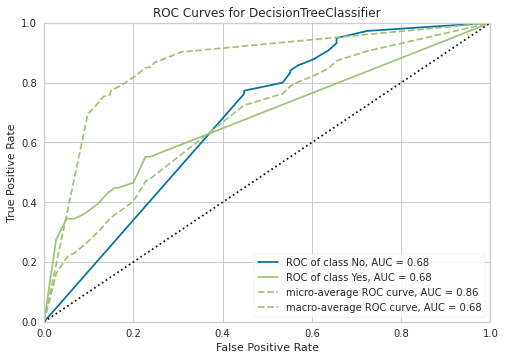

In [42]:
plot_model(tuned_bestModel)

Nous allons modifier quelques paramètres de pycaret pour améliorer notre score

In [44]:
Setup=setup(data=Train,target="Attrition",ignore_features=["EmployeeNumber","HourlyRate","DailyRate"],normalize=True,fix_imbalance=True)

,Description,Value
0,session_id,6938
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1176, 32)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


Comme on peut le voir on a ajouté Zscore pour la normalisation et Smote pour balancer les données
La normalisation va permettre de redimensionner les variables numériques pour qu’elles soient comparables sur une échelle commune.

Si 90% de vos observations appartiennent à la même catégorie et que votre modèle prédit toujours cette catégorie vous allez obtenir une exactitude de 90%, mais vous serez passé complètement à côté du problème. Dans notre cas il faut pouvoir détécter si attrition il y a, mais notre jeu de données n'est pas balancé. Smote nous permet donc de pallier à ce problème.

Nous allons comparer maintenant tout les modèles.

In [45]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8834,0.8202,0.3901,0.7903,0.5127,0.4556,0.4971,13.6270
lightgbm,Light Gradient Boosting Machine,0.8748,0.8033,0.3582,0.7196,0.4754,0.4133,0.4474,0.3770
rf,Random Forest Classifier,0.8688,0.7967,0.2291,0.8514,0.3496,0.3040,0.3881,0.6000
gbc,Gradient Boosting Classifier,0.8639,0.7989,0.3753,0.6250,0.4626,0.3916,0.4111,0.7250
et,Extra Trees Classifier,0.8615,0.7899,0.1907,0.8000,0.3002,0.2545,0.3380,0.5320
xgboost,Extreme Gradient Boosting,0.8615,0.7754,0.3665,0.6460,0.4578,0.3851,0.4107,5.1110
ada,Ada Boost Classifier,0.8603,0.7948,0.5286,0.5773,0.5422,0.4617,0.4675,0.2280
dummy,Dummy Classifier,0.8408,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
lr,Logistic Regression,0.8081,0.8229,0.6582,0.4387,0.5233,0.4104,0.4256,0.5010
ridge,Ridge Classifier,0.7863,0.0000,0.7038,0.4084,0.5149,0.3916,0.4161,0.0480


Catboost Classifier semble être le plus performant, nous allons donc continuer avec ce modèle.

In [ ]:
#catboost=create_model('catboost')

Regardons la courbe ROC

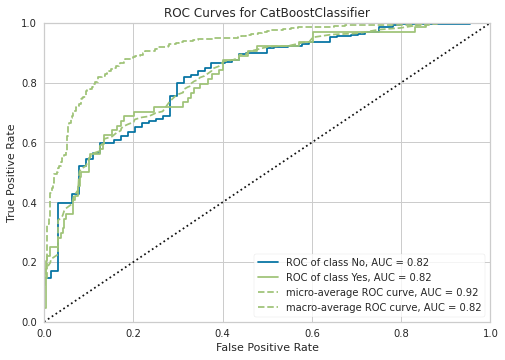

In [46]:
plot_model(best)

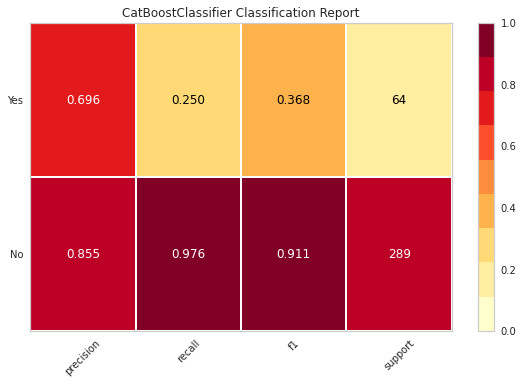

In [47]:
plot_model(best,plot='class_report')

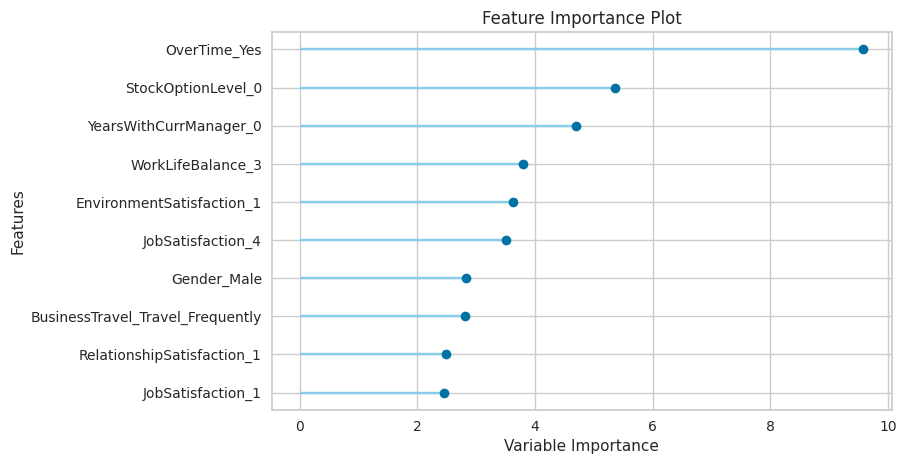

In [48]:
plot_model(best,plot='feature')

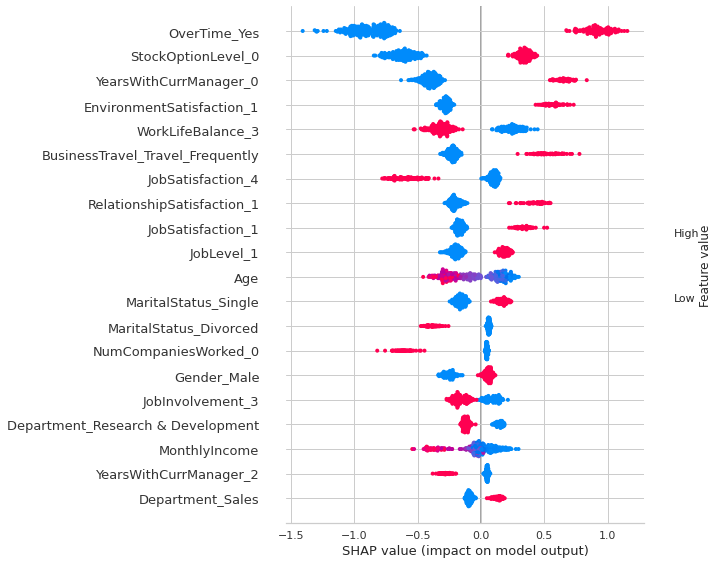

In [49]:
interpret_model(best,plot='summary')

Visiblement la variable la plus importante est "Overtime". Le modèle se base principalement sur cette variable, selon si l'employé travail 

In [51]:
final_model=finalize_model(best)

Nous avons donc notre modèle, prêt à être testé, il suffira de lancer le code suvant sur un fichier test

In [52]:
prediction=predict_model(final_model,data=Test)

In [55]:
prediction

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label,Score
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,8,3,3,8,7,3,0,Yes,0.6416
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,0,8,2,2,7,7,3,6,No,0.9532
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,0,10,2,3,9,7,1,8,No,0.9389
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,14,1,...,1,6,5,3,5,4,0,3,No,0.9758
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,15,4,...,0,10,3,3,9,5,0,8,No,0.8797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,32,No,Travel_Rarely,529,Research & Development,2,3,Technical Degree,2038,4,...,0,4,4,3,4,2,1,2,No,0.8452
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,2054,4,...,0,5,3,1,5,4,0,4,No,0.7988
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,2055,4,...,1,20,3,3,3,2,2,0,No,0.7908
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,1,17,3,3,5,2,0,3,No,0.9849


In [71]:
prediction.Score.mean()

0.8773568027210881

Nous avons deux nouvelles variables qui se sont ajoutés à notre dataframe, la variable Label et Score qui semble être la prediction et avec quelle certitude l'algorithme semble prédire ce label. 

Nous allons calculer l'accuracy de notre modèle sur ces données test

In [74]:
true=0
for i in range(0,len(prediction)):
    if prediction.Attrition.iloc[i]==prediction.Label.iloc[i]:
        true=true+1
accuracy=true/len(prediction)

In [75]:
accuracy

0.8877551020408163

C'est un très bon score

Nous pourrons ensuite le sauvegarder en local avec la commande suivante

In [76]:
save_model(final_model,"final_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['EmployeeNumber',
                                                        'HourlyRate',
                                                        'DailyRate'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Attrition',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Attrition')),
                 ('fix_perfect', Remove_100(target